# 텍스트 분석

### 카운트 기반 벡터화  
Bag of words
- 단어들에 대해 츨현 횟수를 부여하는 방법, 문맥&순서는 무시
- 'and':0' 'baseball:3' 
- 희소행렬 문제 발생

TF-IDF
- 빈도수 기반 텍스트 벡터화 방법
- (term frequency - inverse document frequency)
- 공통적으로 많이 존재하는 단어 - 벡터화 작게
- 한 문서에만 많은 단어 - 벡터화 크게
- 모든 문서에 흔한 단어 제거 가능

전처리
- 목적: 분석의 정확도를 높이기 위해 
- 전처리에서 수행하는 작업 6가지

워드클라우드
- 수치데이터 -> 가시화 (가시성을 높히는 기법)


In [2]:
!pip install matplotlib

In [3]:
!pip install wordcloud

In [37]:
!pip install nltk
import pandas as pd
import glob
import re  # 정규표현식
from functools import reduce

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls') # 파일 병합
all_files #출력하여 내용 확인

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [39]:
all_files_data = []   #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]    #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
1,NaN,2,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019
2,NaN,3,Online Analytical Processing for Business Inte...,"Patel, Jigna Ashish; Sharma, Priyanka",Mary Ann Leibert,2020
3,NaN,4,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
4,NaN,5,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
95,NaN,96,2016 Index IEEE Transactions on Big Data Vol. 2,unknown,unknown,2017
96,NaN,97,Distributed Feature Selection for Efficient Ec...,"Zhao, L.; Chen, Z.; Hu, Y.; Min, G.; Jiang, Z.",unknown,2018
97,NaN,98,PaloPro: a platform for knowledge extraction f...,"Makrynioti, Nantia; Grivas, Andreas; Sardianos...",Inderscience,2017
98,NaN,99,A Hierarchical Distributed Processing Framewor...,"Dong, L.; Lin, Z.; Liang, Y.; He, L.; Zhang, N...",unknown,2016


In [40]:
all_files_data[1]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Optimized Deep Learning for EEG Big Data and S...,"Hosseini, M.; Pompili, D.; Elisevich, K.; Solt...",unknown,2017
1,NaN,2,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017
2,NaN,3,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,Big Earth Data: a comprehensive analysis of vi...,"Merritt, Patrick; Bi, Haixia; Davis, Bradley; ...",John Wiley & Sons Ltd,2018
4,NaN,5,A view-based model of data-cube to support big...,"Nativi, Stefano; Mazzetti, Paolo; Craglia, Max",John Wiley & Sons Ltd,2017
...,...,...,...,...,...,...
95,NaN,96,A Holistic View of Big Data,Won Kim; Ok-Ran Jeong; Chulyun Kim,Idea Group Pub,2014
96,NaN,97,Application of hyper-convergent platform for b...,"Finogeev, Alexey G.; Gamidullaeva, Leyla A.; V...",Inderscience,2020
97,NaN,98,Modeling and Evaluating the Effects of Big Dat...,Enrico Barbierato; Marco Gribaudo; Mauro Iacono,Idea Group Pub,2016
98,NaN,99,Predicting the ratings of Amazon products usin...,"Woo, Jongwook; Mishra, Monika",John Wiley & Sons Ltd,2021


## append VS extend  
append
- 리스트에 하나의 원소로 들어감

extend
- ?

In [52]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일,참고문헌양식
0,NaN,1.0,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020.0,NaN
1,NaN,2.0,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019.0,NaN
2,NaN,3.0,Online Analytical Processing for Business Inte...,"Patel, Jigna Ashish; Sharma, Priyanka",Mary Ann Leibert,2020.0,NaN
3,NaN,4.0,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014.0,NaN
4,NaN,5.0,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016.0,NaN
...,...,...,...,...,...,...,...
996,NaN,96.0,Toward Business Process Innovation in the Big ...,"Saide, Saide; Sheng, Margaret L.",Mary Ann Leibert,2020.0,NaN
997,NaN,97.0,Overcoming Resistance to Big Data and Operatio...,"Phillips-Wren, Gloria; McKniff, Sueanne",Mary Ann Leibert,2020.0,NaN
998,NaN,98.0,Big Data for Social Good,unknown,Mary Ann Leibert,2015.0,NaN
999,NaN,99.0,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018.0,NaN


In [53]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding = 'utf-8-sig', index = False)

In [54]:
all_title = all_files_data_concat['제목']
all_title #출력하여 내용 확인

0       Call for Special Issue Papers: Big Data Analyt...
1       Interview with Dr. Silvio Carta, Author of the...
2       Online Analytical Processing for Business Inte...
3       A Big Data Guide to Understanding Climate Chan...
4       Call for Papers: Special Issue on Big Data in ...
                              ...                        
996     Toward Business Process Innovation in the Big ...
997     Overcoming Resistance to Big Data and Operatio...
998                              Big Data for Social Good
999     Big Data, Efficient Markets, and the End of Da...
1000                         Big data (lost) in the cloud
Name: 제목, Length: 1001, dtype: object

In [55]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [56]:
# 정제 작업
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    # re -영어가 아닌 걸 공백으로 대체하라
    EnWordsToken = word_tokenize(EnWords.lower())       # 정규화 - 소문자로 & 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 불용어 처리
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]  # lemmatize 
    words.append(EnWordsTokenStopLemma)                 # 

In [57]:
print(words)

[['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management'], ['interview', 'dr', 'silvio', 'carta', 'author', 'book', 'big', 'data', 'code', 'discrete', 'city', 'routledge'], ['online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data'], ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['call', 'paper', 'special', 'issue', 'big', 'data', 'robotics'], ['deep', 'learning', 'big', 'sparse', 'behavioral', 'data'], ['us', 'big', 'data', 'city'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['new', 'discrimination', 'diagram', 'basalt', 'based', 'big', 'data', 'research'], ['curating', 'big', 'data', 'made', 'simple', 'perspective', 'scientific', 'community'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gath

In [58]:
words2 = list(reduce(lambda x, y: x+y, words)) # 인자-concat , 데이터셋
print(words2) #출력하여 내용 확인

['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management', 'interview', 'dr', 'silvio', 'carta', 'author', 'book', 'big', 'data', 'code', 'discrete', 'city', 'routledge', 'online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data', 'big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'deep', 'learning', 'big', 'sparse', 'behavioral', 'data', 'us', 'big', 'data', 'city', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'new', 'discrimination', 'diagram', 'basalt', 'based', 'big', 'data', 'research', 'curating', 'big', 'data', 'made', 'simple', 'perspective', 'scientific', 'community', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'land

In [59]:
count = Counter(words2) # =딕셔너리
count 

Counter({'call': 30,
         'special': 38,
         'issue': 48,
         'paper': 30,
         'big': 1009,
         'data': 1111,
         'analytics': 119,
         'agricultural': 6,
         'disaster': 4,
         'management': 34,
         'interview': 1,
         'dr': 1,
         'silvio': 1,
         'carta': 1,
         'author': 2,
         'book': 1,
         'code': 1,
         'discrete': 1,
         'city': 7,
         'routledge': 1,
         'online': 14,
         'analytical': 2,
         'processing': 31,
         'business': 25,
         'intelligence': 26,
         'guide': 2,
         'understanding': 9,
         'climate': 3,
         'change': 4,
         'case': 10,
         'theory': 3,
         'guided': 1,
         'science': 31,
         'robotics': 3,
         'deep': 17,
         'learning': 50,
         'sparse': 5,
         'behavioral': 3,
         'us': 1,
         'new': 42,
         'discrimination': 3,
         'diagram': 1,
         'basalt': 1

In [60]:
word_count = dict()

for tag, counts in count.most_common(50): # 상위 50개만 뽑기
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1111
big : 1009
analytics : 119
based : 107
analysis : 102
nan : 101
system : 58
using : 53
learning : 50
model : 50
driven : 49
issue : 48
earth : 43
new : 42
approach : 42
challenge : 40
application : 40
special : 38
platform : 38
management : 34
algorithm : 34
era : 33
processing : 31
science : 31
call : 30
paper : 30
health : 30
cloud : 28
mining : 28
perspective : 27
machine : 27
review : 27
opportunity : 27
intelligence : 26
business : 25
framework : 25
computing : 25
smart : 25
development : 23
information : 22
performance : 22
service : 21
use : 21
research : 20
network : 20
optimization : 20
china : 20
internet : 19
thing : 19
sustainable : 18


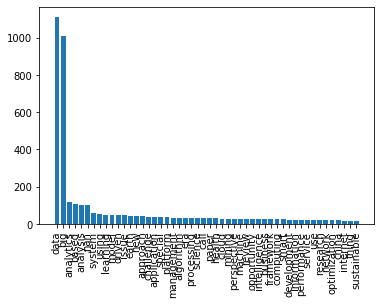

In [61]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()